In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat

from onix.data_tools import get_experiment_data

In [6]:
data_dict, headers = get_experiment_data(529028) #529026,7,8

data = data_dict['channel1']
sample_rate = headers['digitizer_sample_rate']
run_time = headers['run_time_s']

times = np.linspace(0, run_time, sample_rate*run_time)

In [7]:
headers

{'digitizer_sample_rate': 1000000,
 'awg_pulse_freq': 1000000.0,
 'run_time_s': 5,
 'amplitude_V': 0.3,
 'V_range': 0.5,
 'data_info': {'name': 'DigitizerClockSharing',
  'data_number': 529028,
  'save_time': '2024-06-13 14:51:57',
  'save_epoch_time': 1718304717.501852}}

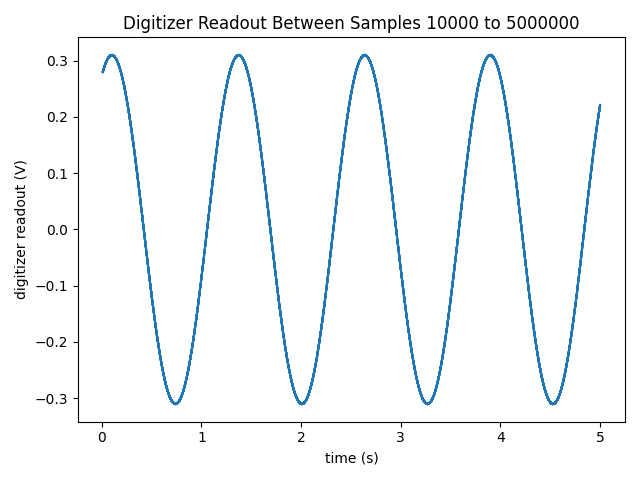

In [10]:
fig, ax1 = plt.subplots()

start_idx, end_idx = , data.size
ax1.plot(times[start_idx:end_idx], data[start_idx:end_idx])
ax1.set_xlabel('time (s)')
ax1.set_ylabel('digitizer readout (V)')
plt.title(f'Digitizer Readout Between Samples {start_idx} to {end_idx}')
plt.tight_layout()
plt.show()

In [12]:
%%script false --no-raise-error

fft = np.fft.rfft(data)
fft_freqs = np.fft.rfftfreq(data.size, 1/sample_rate)

fig, ax1 = plt.subplots()
ax1.loglog(fft_freqs, np.abs(fft))
plt.show()

In [ ]:
plt.close()

In [ ]:
actual_amplitude_V = np.max(np.abs(data)) # this is a valid approximation of the amplitude because of the discontinuity in sampling

phases = np.arcsin(data[start_idx:end_idx]/actual_amplitude_V)
phase_difs = (phases - np.roll(phases, 1))[1:]
avg_phase_dif = np.mean(np.abs(phase_difs)) # average phase difference between consecutive datapoints
print(avg_phase_dif)
print(np.mean(phase_difs))